导入所需的库：pyarrow, panda, numpy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1 读取文件
> df：DataFrame变量，储存原始数据

In [2]:
df = pd.read_parquet('vwap_1h.parquet', engine='pyarrow')
df = df.dropna(axis=1, how='all')
df

,BTCUSDT,ETHUSDT,BCHUSDT,XRPUSDT,EOSUSDT,LTCUSDT,TRXUSDT,ETCUSDT,LINKUSDT,XLMUSDT,...,WOOUSDT,JASMYUSDT,DARUSDT,GALUSDT,OPUSDT,CVCUSDT,SCUSDT,DGBUSDT,RAYUSDT,FTTUSDT
2020-01-01 00:00:00,7176.836426,128.825485,204.244858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,7202.528320,129.893555,206.118866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,7224.960938,130.683044,207.021423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,7226.264648,130.227249,206.394760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,7218.387207,130.341431,206.157745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-29 19:00:00,20146.992188,1109.313354,106.113907,0.329918,0.939355,53.378349,0.064685,15.205976,6.298738,0.110405,...,0.174463,0.009191,0.301179,3.035408,0.600803,0.138584,NaN,0.009303,0.662204,24.928453
2022-06-29 20:00:00,20272.255859,1114.224121,106.687263,0.332309,0.945940,53.902519,0.065151,15.362687,6.380641,0.111513,...,0.176914,0.009258,0.305617,3.050507,0.597994,0.140762,NaN,0.009420,0.668737,25.096380
2022-06-29 21:00:00,20272.314453,1113.255127,106.710442,0.332733,0.944540,53.717728,0.065160,15.341277,6.331448,0.111001,...,0.175531,0.009327,0.304234,3.036727,0.594505,0.140684,NaN,0.009394,0.670309,25.095186
2022-06-29 22:00:00,20215.296875,1109.978882,105.021347,0.331085,0.941562,53.647266,0.064975,15.259324,6.281204,0.110064,...,0.173584,0.009272,0.303565,3.024881,0.587689,0.140669,NaN,0.009348,0.669034,25.038280


### 2 动量因子：过去20天的平均日度收益率

#### 2.2 利用vwap计算日度收益率

> DRoR_h：对于每个时点，过去24小时的日度收益率

> DRoR_d：对于每个日度换仓节点00:00，过去24小时的日度收益率

In [3]:
DRoR = df[df.index.hour == 0].copy()
DRoR = DRoR.pct_change(1, fill_method=None)
DRoR

,BTCUSDT,ETHUSDT,BCHUSDT,XRPUSDT,EOSUSDT,LTCUSDT,TRXUSDT,ETCUSDT,LINKUSDT,XLMUSDT,...,WOOUSDT,JASMYUSDT,DARUSDT,GALUSDT,OPUSDT,CVCUSDT,SCUSDT,DGBUSDT,RAYUSDT,FTTUSDT
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.002876,0.012458,0.001486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.036049,-0.025823,-0.046974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,0.053754,0.054155,0.134609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,0.008249,0.005289,0.020455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-25,0.006860,0.061894,-0.021095,0.080065,0.021494,-0.002109,0.030644,0.025181,0.030054,0.069459,...,0.028279,-0.002376,0.035063,0.036352,0.106517,0.052652,NaN,0.056802,0.029576,0.011431
2022-06-26,0.011248,0.016780,0.011347,-0.000868,0.005456,0.054242,-0.015932,0.009010,0.001496,-0.010754,...,-0.039731,0.014234,0.049610,0.060936,0.025642,-0.012779,NaN,0.016441,-0.003959,0.043004
2022-06-27,-0.019105,-0.029030,-0.013029,-0.010374,-0.012695,-0.030379,0.009038,0.035540,-0.068056,-0.046045,...,-0.064575,-0.051978,-0.045046,-0.082806,-0.067330,-0.055371,NaN,-0.072833,-0.052704,-0.022153
2022-06-28,-0.012849,-0.012474,-0.019011,-0.024089,-0.008987,-0.021052,0.022143,-0.032077,-0.027997,-0.012064,...,-0.041684,0.008368,-0.005546,0.019248,-0.016518,0.042401,NaN,-0.024983,-0.012436,0.000875


#### 2.3 计算动量因子值（过去20天的平均日度收益率）

> momentum：对于每个日度换仓节点00:00，过去20天的平均日度收益率

In [4]:
momentum = DRoR.rolling(window=20).mean()
momentum

,BTCUSDT,ETHUSDT,BCHUSDT,XRPUSDT,EOSUSDT,LTCUSDT,TRXUSDT,ETCUSDT,LINKUSDT,XLMUSDT,...,WOOUSDT,JASMYUSDT,DARUSDT,GALUSDT,OPUSDT,CVCUSDT,SCUSDT,DGBUSDT,RAYUSDT,FTTUSDT
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-25,-0.015501,-0.017250,-0.023511,-0.002374,-0.010945,-0.004478,-0.007723,-0.012517,0.002115,-0.004222,...,0.020346,-0.007709,-0.012873,-0.017460,-0.036109,-0.005785,NaN,0.000892,-0.005777,0.002687
2022-06-26,-0.015513,-0.016987,-0.020910,-0.002955,-0.010492,-0.001946,-0.009371,-0.012185,-0.000091,-0.005140,...,0.017744,-0.007404,-0.010107,-0.014763,-0.026740,-0.008983,NaN,0.001111,-0.006581,0.004234
2022-06-27,-0.017256,-0.017490,-0.021630,-0.003074,-0.010640,-0.002390,-0.008319,-0.010016,-0.002971,-0.006224,...,0.013674,-0.007714,-0.011830,-0.017804,-0.033441,-0.013231,NaN,-0.002412,-0.009905,0.002568
2022-06-28,-0.018810,-0.018892,-0.022781,-0.006148,-0.011988,-0.004749,-0.008120,-0.011208,-0.011180,-0.006999,...,0.008692,-0.009422,-0.012357,-0.015148,-0.027758,-0.012980,NaN,-0.009503,-0.010457,0.001602


#### 2.4 动量因子的IC

> ic：动量因子对于未来一天日度收益率的信息系数

In [5]:
mask = ~np.isnan(DRoR.shift(-1)) & ~np.isnan(momentum)
DRoRt_clear = DRoR[mask]
momentum_clear = momentum[mask]

IC: 0.21719212054892792
IC for each crypto: BTCUSDT    0.232142
ETHUSDT    0.238669
BCHUSDT    0.209503
XRPUSDT    0.229210
EOSUSDT    0.195845
             ...   
CVCUSDT    0.202823
SCUSDT     0.178964
DGBUSDT    0.212011
RAYUSDT    0.185480
FTTUSDT    0.296882
Length: 135, dtype: float64


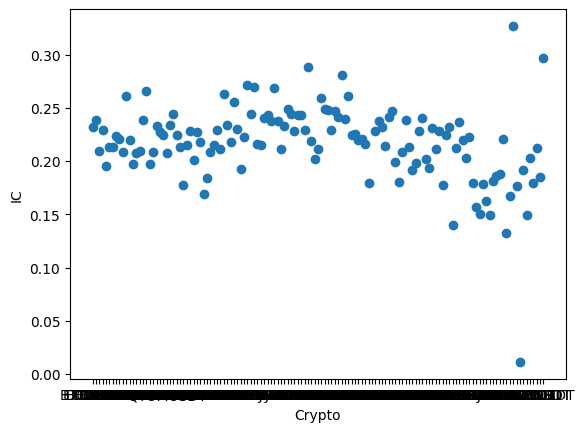

In [6]:
ic = momentum_clear.corrwith(DRoRt_clear)    # normalisation does not affect correlation
print(f"IC: {ic.mean()}")
print(f"IC for each crypto: {ic}")

plt.plot(ic, 'o')
plt.xlabel('Crypto')
plt.ylabel('IC')
plt.show()

### 3 投资组合：做多最大动量⼀组，做空最小动量⼀组

#### 3.1 对截面动量因子值进行10分组排序

> group：以每个日度换仓节点00:00为横截面，对截面动量因子值进行10分组排序

In [7]:
def get_deciles(data):
    return pd.qcut(data, 10, labels=False, duplicates='drop')

group = momentum.apply(get_deciles, axis=1)
group


,BTCUSDT,ETHUSDT,BCHUSDT,XRPUSDT,EOSUSDT,LTCUSDT,TRXUSDT,ETCUSDT,LINKUSDT,XLMUSDT,...,WOOUSDT,JASMYUSDT,DARUSDT,GALUSDT,OPUSDT,CVCUSDT,SCUSDT,DGBUSDT,RAYUSDT,FTTUSDT
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-25,0.0,0.0,0.0,6.0,1.0,5.0,3.0,1.0,7.0,5.0,...,9.0,3.0,1.0,0.0,0.0,4.0,NaN,7.0,4.0,8.0
2022-06-26,0.0,0.0,0.0,6.0,1.0,6.0,2.0,1.0,7.0,4.0,...,9.0,3.0,2.0,0.0,0.0,2.0,NaN,7.0,3.0,8.0
2022-06-27,0.0,0.0,0.0,6.0,2.0,7.0,4.0,3.0,6.0,5.0,...,9.0,4.0,2.0,0.0,0.0,1.0,NaN,6.0,3.0,8.0
2022-06-28,0.0,0.0,0.0,6.0,2.0,6.0,5.0,3.0,3.0,5.0,...,9.0,4.0,2.0,1.0,0.0,2.0,NaN,4.0,3.0,8.0


#### 3.2 各组日度收益率
> group_DRoR：按照上文分组排序后，各组的日收益率

In [8]:
group_DRoR = pd.DataFrame(index=DRoR.index)
for i in range(10):
    group_DRoR[f'Group_{i+1}'] = DRoR[group == i].mean(axis=1)
group_DRoR

,Group_1,Group_2,Group_3,Group_4,Group_5,Group_6,Group_7,Group_8,Group_9,Group_10
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-06-25,0.031226,0.036391,0.031775,0.036920,0.066090,0.039790,0.048177,0.047989,0.037155,0.016021
2022-06-26,0.010086,0.012124,0.002910,0.008277,0.005048,0.007355,0.034287,0.049372,0.044253,-0.015901
2022-06-27,-0.052831,-0.060068,-0.049596,-0.040610,-0.049335,-0.049778,-0.038055,-0.048696,-0.052869,-0.045090
2022-06-28,-0.013947,-0.004254,0.014634,0.001052,0.011681,0.008670,-0.001422,0.009514,0.022266,-0.003660


#### 3.3 投资组合年化收益

In [9]:
port_DRoR = group_DRoR[['Group_1', 'Group_10']].iloc[20:]
port_DRoR[['Group_1']] = -port_DRoR[['Group_1']]
port_DRoR

,Group_1,Group_10
2020-01-21,0.005920,0.012865
2020-01-22,-0.011730,0.005224
2020-01-23,0.009473,0.010919
2020-01-24,0.029549,-0.062151
2020-01-25,0.004830,-0.045969
...,...,...
2022-06-25,-0.031226,0.016021
2022-06-26,-0.010086,-0.015901
2022-06-27,0.052831,-0.045090
2022-06-28,0.013947,-0.003660


In [10]:
ARoR = (1 + port_DRoR.mean()) ** 365 - 1
ARoR

Group_1        36.053074
Group_10    17392.576172
dtype: float32

In [11]:
ARoR = ((1 + port_DRoR).prod()) ** (365 / len(port_DRoR)) - 1
print(ARoR)

Group_1       18.515528
Group_10    6434.949707
dtype: float32


In [12]:
def gen_weights():
    w = np.random.rand(2)
    return w / np.sum(w)

def port_ret(w):
    return np.sum(w * ARoR)

def port_vol(w):
    return np.sqrt(np.dot(w.T, np.dot(port_DRoR.cov() * 365, w)))

def gen_portfolios(n):
    for _ in range(n):
        w = gen_weights()
        yield w[0], w[1], port_ret(w), port_vol(w)

ports = pd.DataFrame(gen_portfolios(1000), columns=['Weights0', 'Weights1', 'Return', 'Volatility'])
ports

,Weights0,Weights1,Return,Volatility
0,0.965571,0.034429,239.425833,1.090791
1,0.133649,0.866351,5577.399364,1.166704
2,0.427841,0.572159,3689.738881,0.614517
3,0.477419,0.522581,3371.621104,0.557955
4,0.525247,0.474753,3064.738478,0.523946
...,...,...,...,...
995,0.047712,0.952288,6128.810933,1.356136
996,0.437344,0.562656,3628.761009,0.602244
997,0.623599,0.376401,2433.664784,0.531728
998,0.565093,0.434907,2809.069687,0.514049


#### 3.4 投资组合年化夏普

In [13]:
ports['Sharpe'] = (ports['Return'] - 0.03) / ports['Volatility']

<Axes: xlabel='Volatility', ylabel='Return'>

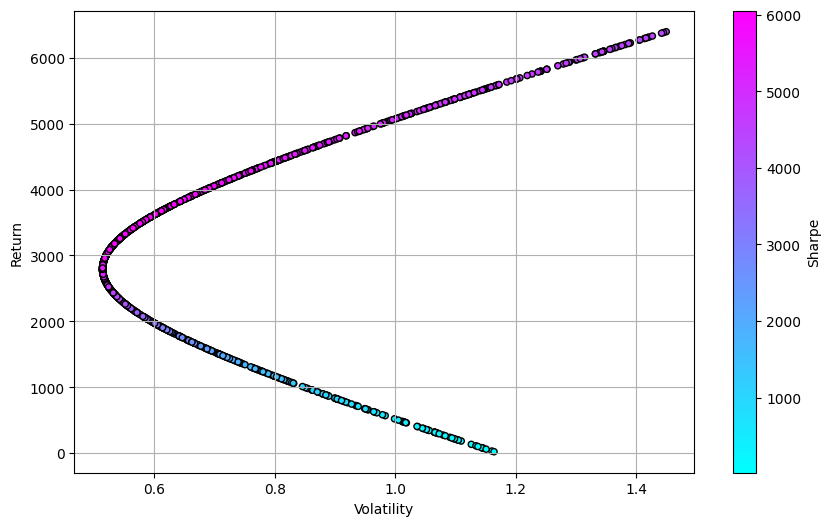

In [14]:
ports.plot.scatter(x='Volatility', y='Return', c='Sharpe', cmap='cool', edgecolors='black', figsize=(10, 6), grid=True)

<Axes: xlabel='Weights0', ylabel='Sharpe'>

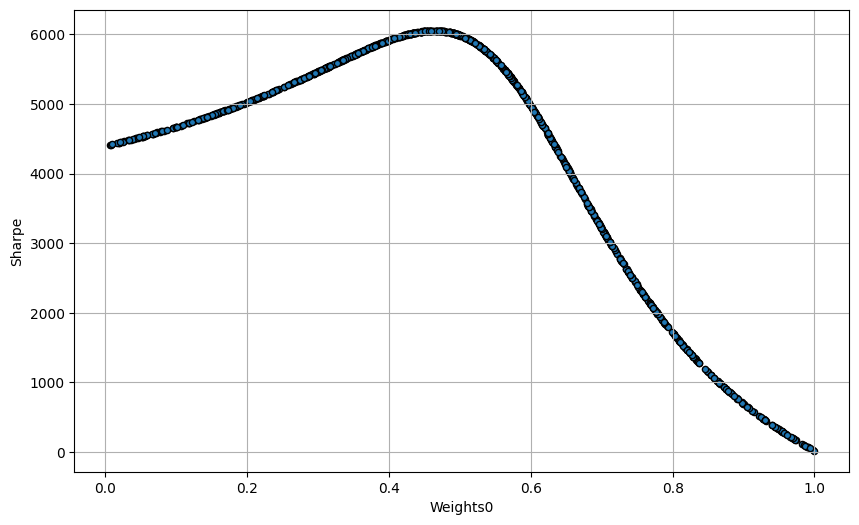

In [15]:
ports.plot.scatter(x='Weights0', y='Sharpe', edgecolors='black', figsize=(10, 6), grid=True)  

In [16]:
optimum_port = list(zip(port_DRoR.columns, ports.loc[ports.Sharpe.idxmax(), ['Weights0', 'Weights1']]))
print(f"Optimum portfolio: {optimum_port[0][0]}: {optimum_port[0][1]:.2f}, {optimum_port[1][0]}: {optimum_port[1][1]:.2f}")

Optimum portfolio: Group_1: 0.46, Group_10: 0.54
